In [1]:
%%time
dataset_name = "W19_comb"
df_list = "BES_Panel"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
# get full set of inferred "cross wave" auth-lib/left-right values and ages
pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
# pan_dataset_allr_values = pan_dataset_allr_values.loc[BES_Panel.index].sort_index()
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')


Toggle code

var_type (8079, 14)
Wall time: 17.1 s


In [2]:
search(BES_Panel,"gender")

genderRolesW10    30237
impGenderW14       7801
gender            96090
dtype: int64

In [18]:
pan_dataset_allr_values

,Economic: Left(0) <-> Right(200){uniform},Social: Liberalism(0) <-> Conservatism(200){uniform},Economic: Left <-> Right{gaussian-ish},Social: Liberalism <-> Conservatism{gaussian-ish},Economic: Left <-> Right{gaussian-ish}completish,Economic: Left <-> Right{gaussian-ish}complete,Social: Liberalism <-> Conservatism{gaussian-ish}completish,Social: Liberalism <-> Conservatism{gaussian-ish}complete,Economic: Left <-> Right{gaussian-ish}complete_fully,Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully
id,,,,,,,,,,
1,6.0,183.0,-1.913311,1.379564,-1.913311,-1.913311,1.379564,1.379564,-1.913311,1.379564
2,195.0,54.0,1.929016,-0.648342,1.929016,1.929016,-0.648342,-0.648342,1.929016,-0.648342
3,74.0,116.0,-0.313073,0.242132,-0.313073,-0.313073,0.242132,0.242132,-0.313073,0.242132
4,149.0,132.0,0.643054,0.470176,0.643054,0.643054,0.470176,0.470176,0.643054,0.470176
5,169.0,99.0,1.004469,0.012041,1.004469,1.004469,0.012041,0.012041,1.004469,0.012041
...,...,...,...,...,...,...,...,...,...,...
98447,118.0,57.0,0.217387,-0.585382,0.217387,0.217387,-0.585382,-0.585382,0.217387,-0.585382
98448,159.0,23.0,0.791833,-1.276719,0.791833,0.791833,-1.276719,-1.276719,0.791833,-1.276719
98449,42.0,49.0,-0.789732,-0.721598,-0.789732,-0.789732,-0.721598,-0.721598,-0.789732,-0.721598


In [9]:
pan_dataset_ages["equalisedAgeGroup_at_W19_detailed"].value_counts().sort_index()

(17.0, 24.0]     6930
(24.0, 28.0]     6928
(28.0, 33.0]     6929
(33.0, 37.0]     6931
(37.0, 41.0]     6927
(41.0, 46.0]     6929
(46.0, 50.0]     6929
(50.0, 55.0]     6929
(55.0, 59.0]     6929
(59.0, 63.0]     6930
(63.0, 67.0]     6929
(67.0, 71.0]     6928
(71.0, 75.0]     6929
(75.0, 106.0]    6929
Name: equalisedAgeGroup_at_W19_detailed, dtype: int64

In [4]:
BES_Panel["gender"]

id
1          Male
2        Female
3        Female
4        Female
5        Female
          ...  
98447    Female
98448      Male
98449      Male
98450    Female
98451      Male
Name: gender, Length: 97006, dtype: category
Categories (2, object): [Male < Female]

In [78]:
df = pan_dataset_allr_values.copy()
df["ageGroup"] = pan_dataset_ages["equalisedAgeGroup_at_W19_detailed"]
df["gender"] = BES_Panel["gender"]
df["wt"] = BES_Panel[search(BES_Panel,"wt_(full|new)_W\d+$").index].mean(axis=1)

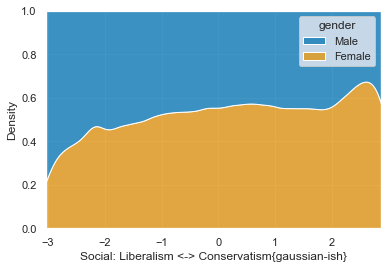

In [95]:
sns.kdeplot(data = df.dropna(),x="Social: Liberalism <-> Conservatism{gaussian-ish}",hue="gender", multiple='fill', weights="wt")

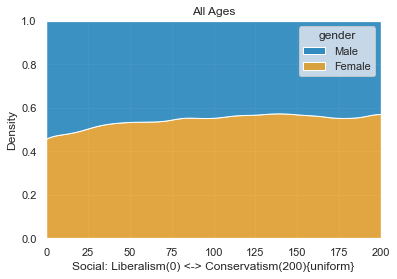

In [96]:
sns.kdeplot(data = df.dropna(),x="Social: Liberalism(0) <-> Conservatism(200){uniform}",hue="gender",
            multiple='fill',cut=0, weights="wt");
plt.title("All Ages");

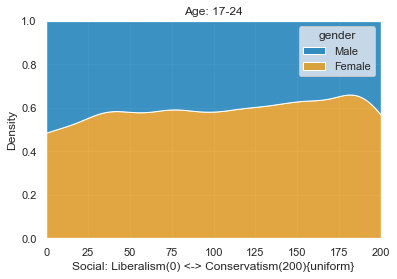

In [97]:
mask = df["ageGroup"] == df["ageGroup"].cat.categories[0]
sns.kdeplot(data = df[mask].dropna(),x="Social: Liberalism(0) <-> Conservatism(200){uniform}",hue="gender",
            multiple='fill',cut=0, weights="wt")
plt.title("Age: 17-24");

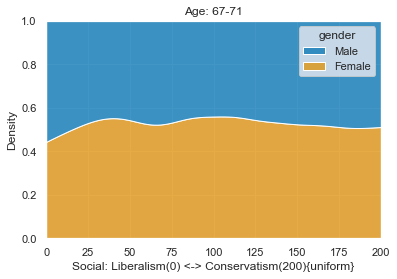

In [98]:
mask = df["ageGroup"] == df["ageGroup"].cat.categories[-3]
sns.kdeplot(data = df[mask].dropna(),x="Social: Liberalism(0) <-> Conservatism(200){uniform}",hue="gender",
            multiple='fill',cut=0, weights="wt")
plt.title("Age: 67-71");

In [ ]:
mask = df["ageGroup"] == df["ageGroup"].cat.categories[0]
sns.kdeplot(data = df[mask].dropna(),x="Social: Liberalism(0) <-> Conservatism(200){uniform}",hue="gender", multiple='fill')
plt.title("Age: 17-24");

In [81]:
df["ageGroup"].cat.categories[-3]

Interval(67.0, 71.0, closed='right')

In [62]:
def usekdeplot(data,x,hue,multiple,color):
    sns.kdeplot(data=data,x = x,hue=hue,multiple=multiple,color=color)

In [51]:
g = sns.FacetGrid(df.dropna(), col="ageGroup",
                  height=1.7, aspect=4,col_wrap=4)
g.map(sns.kdeplot, );

SyntaxError: invalid syntax (<ipython-input-51-86ac23ef04e1>, line 3)

In [ ]:
g = sns.FacetGrid(df.dropna(), col="ageGroup",
                  height=1.7, aspect=4,col_wrap=4,)
g.map(sns.kdeplot, "Social: Liberalism <-> Conservatism{gaussian-ish}completish");

In [65]:
# g = sns.FacetGrid(df.dropna(), col="ageGroup",
#                   height=1.7, aspect=4,col_wrap=4,)
# g.map(usekdeplot, data=data,x="Social: Liberalism <-> Conservatism{gaussian-ish}completish",hue="gender",multiple="fill");